# 2023-09-27 Transient Intro

## Last time

* Structured by-hand differentiation
* Concept of PDE-based inference (inverse problems)
* The Blasius problem (activity)

## Today

* Blasius working session
* Intro to transient problems
* Forward Euler method
* Observing instability

In [1]:
using Plots
default(linewidth=3)
using LinearAlgebra
using SparseArrays
using Zygote

function vander(x, k=nothing)
    if k === nothing
        k = length(x)
    end
    V = ones(length(x), k)
    for j = 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end


vander (generic function with 2 methods)

# [Compressible Blasius boundary layer](https://en.wikipedia.org/wiki/Blasius_boundary_layer#Compressible_Blasius_boundary_layer)

* Activity will solve this 1D nonlinear PDE

# Ordinary Differential Equations

Given initial condition $u_0 = u(t=0)$, find $u(t)$ for $t > 0$ that satisfies

$$ \dot u \equiv \frac{\partial u}{\partial t} = f(t, u) $$

| Application | $u$ | $f$ |
| --- | --- | --- |
| Orbital dynamics | position, momentum | conservation of momentum|
| Chemical reactions | concentration | conservation of atoms |
| Epidemiology | infected/recovered population | transmission and recovery |
| Heat transfer | temperature | conservation of energy |
| Seismology | displacement, momentum | conservative of momentum |

# Solving differential equations

## Linear equations

$$ \dot u = A(t) u + \text{source}(t)$$

* Autonomous if $A(t) = A$ and source independent of $t$

* Suppose $u$ and $a = A$ are scalars: $u(t) = e^{at} u_0$

## Can do the same for systems

$$ y(t) = e^{A t} y_0 $$

### What does it mean to exponentiate a matrix?

Taylor series!

$$ e^A = 1 + A + \frac{A^2}{2} + \frac{A^3}{3!} + \dotsb $$
and there are many [practical ways to compute it](https://doi.org/10.1137/S00361445024180).

#### Question
Suppose that the diagonalization $A = X \Lambda X^{-1}$ exists and derive a finite expression for the matrix exponential using the scalar `exp` function.

# Forward Euler method

In [2]:
function ode_euler(f, u0; tfinal=10., h=0.1)
    u = copy(u0)
    t = 0.
    thist = [t]
    uhist = [u0]
    while t < tfinal
        tnext = min(t+h, tfinal)
        h = tnext - t
        u += h * f(t, u)
        t = tnext
        push!(thist, t)
        push!(uhist, u)
    end
    thist, hcat(uhist...)
end

ode_euler (generic function with 1 method)

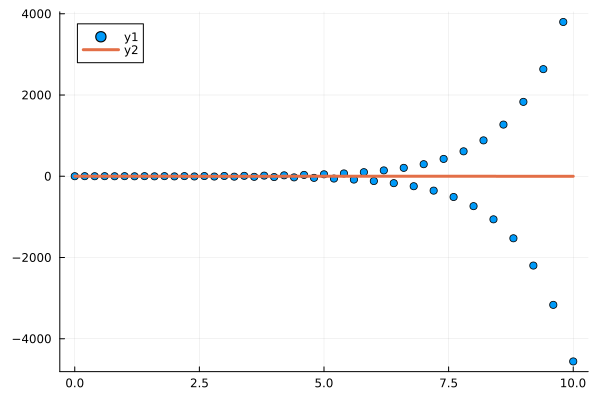

In [3]:
f1(t, u; k=11) = -k * (u .- cos(t))

thist, uhist = ode_euler(f1, [.5], tfinal=10, h=.2)
scatter(thist, uhist[1,:])
plot!(cos)